## Breast Cancer Prediction (BCP) By Franklyn C. Ebikam

### Introduction

The Breast Cancer Dataset is a dataset of features computed from breast mass of candidate patients. Each instance of features corresponds to a malignant or benign tumour. The motivation behind studying this dataset is the develop an algorithm, which would be able to predict whether a patient has a malignant or benign tumour, based on the features computed from her breast mass. I decided to use this dataset for my first blog post on machine learning, since its a very straightforward dataset with no missing values and all variables being real valued (no categorical variables).

* Number of attributes for each patient : 30
* Number of patients : 569
* Number of class labels : 2 ('B' and 'M' corresponding to 357 Benign and 212 Malignant patients)

The scope of this project is to 1) get started with using the packages : pandas and scikit-learning, and 2) getting familiar with the general flow of solving a data related machine learning problem. In this project will try to get back to We want to broadly go through the various steps (importing the data, cleaning the data, preprocessing, building models and optimizing them) without going too much in depth with each step. However, I assume you are familiar with the concepts behind Logistic Regression and Neural Networks. If not, Andrew Ng's Coursera course is a great place to start (It's what I used!)

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, BaggingClassifier
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import FeatureUnion, Pipeline

# initialize some package settings
sns.set(style="whitegrid", color_codes=True, font_scale=1.3)

warnings.filterwarnings('ignore')

import data_reader as dr

from matplotlib import rcParams
rcParams['xtick.major.pad'] = 1
rcParams['ytick.major.pad'] = 1
rcParams['figure.figsize'] = 11.7, 8.27

### Data Processing 
First of all, we need to import our data using Pandas module. And, finally, perform some data mining technics - such as renaming columns, peeking on the data set. Removimg unnecessary columns and also NaN's. Creating the class label that will later be used in our prediction.

In [2]:
# Load dataset from sklearn
breast = load_breast_cancer()

In [3]:
# For easy of manipulation, convert dataset to pandas dataframe
breast_data = pd.DataFrame(breast.data, columns = breast.feature_names)

In [4]:
# Append dataframe containing tumor features with diagnostic outcomes.
# This labels will be used for supervised learning.
breast_data['class_label'] = breast.target

In [5]:
# Calling replace_colname to replace ANY column with underscore in their name.
col_new = dr.replace_colnames(breast_data.columns)

# Changed columns names
breast_data.columns = col_new

In [6]:
# Printing dataset dimension
print('Cancer data set dimensions {}'.format(breast_data.shape))

Cancer data set dimensions (569, 31)


In [7]:
# Peeking on the dataset
breast_data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,class_label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
# Dataset description
breast_data.describe().transpose().head()

,count,mean,std,min,25%,50%,75%,max
mean_radius,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.7800,28.1100
mean_texture,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.8000,39.2800
mean_perimeter,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.1000,188.5000
mean_area,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.7000,2501.0000
mean_smoothness,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634


In [9]:
# Checking for null values and NaN's
breast_data.isnull().sum()
breast_data.isna().sum().head()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
dtype: int64

In [10]:
# Condition that helps in creating a new column
breast_data['diagnosis'] = breast_data['class_label'].apply(lambda x: 'M' if x == 1 else 'B') # this line can also be used to create

In [11]:
# Swapping class_label & diagnosis
cols = list(breast_data.columns)
a, b = cols.index('class_label'), cols.index('diagnosis')
cols[b], cols[a] = cols[a], cols[b]
breast_data = breast_data[cols]

In [12]:
# Subsetting the breast_data
X = np.array(breast_data.iloc[:, 0:-2].values)
y = np.array(breast_data.iloc[:, -1].values)

In [13]:
# Quick glimpse of tumor features (mean values) in relation to diagnosis
np.round(breast_data.groupby('class_label').mean(), decimals=4)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
class_label,,,,,,,,,,,,,,,,,,,,,
0,17.4628,21.6049,115.3654,978.3764,0.1029,0.1452,0.1608,0.0880,0.1929,0.0627,...,21.1348,29.3182,141.3703,1422.2863,0.1448,0.3748,0.4506,0.1822,0.3235,0.0915
1,12.1465,17.9148,78.0754,462.7902,0.0925,0.0801,0.0461,0.0257,0.1742,0.0629,...,13.3798,23.5151,87.0059,558.8994,0.1250,0.1827,0.1662,0.0744,0.2702,0.0794


In [14]:
# Counting & printing the total number of Malignant & Benign records in the entire dataset
total = breast_data['diagnosis'].count()
malignant = breast_data[breast_data['diagnosis'] == "B"]['diagnosis'].count()
print(f"There are { malignant} of Malignant records in the entire dataset ")
print(f"There are { total - malignant } of Benign records in the entire dataset ")

There are 212 of Malignant records in the entire dataset 
There are 357 of Benign records in the entire dataset 


In [15]:
# For visual comparisons of differential diagnosis...
# create to dataframes - one for benign, one for malignant tumor data
df_benign = breast_data[breast_data['class_label'] == 0]
df_malignant = breast_data[breast_data['class_label'] == 1]

# Create list of features related to mean tumor characteristics
features_means = list(breast_data.columns[0:10])

In [16]:
outcome_count = breast_data.class_label.value_counts()
outcome_count = pd.Series(outcome_count)
outcome_count = pd.DataFrame(outcome_count)
outcome_count.index = ['Benign', 'Malignant']

# breast_data.class_label.value_counts()[1]
outcome_count['Percent'] = np.round(100 * outcome_count['class_label']/sum(outcome_count['class_label'])).astype('int')
malignant_p = np.round((100 * float(breast_data.class_label.value_counts()[0])/float((len(breast_data)))), decimals=2)
benign_p = np.round((100 * float(breast_data.class_label.value_counts()[1])/float((len(breast_data)))), decimals=2)

print(f'The Percentage of tumors classified as \'malignant\' in this data set is: { malignant_p }')
print(f'The Perecentage of tumors classified as \'Benign\' in this data set is: { benign_p }\n')

print(f'A good classifier should therefore outperform blind guessing knowing the proportions i.e. > { benign_p }% accuracy')
print(f'A good classifier should therefore outperform blind guessing knowing the proportions i.e. > { malignant_p }% accuracy')
outcome_count

The Percentage of tumors classified as 'malignant' in this data set is: 37.26
The Perecentage of tumors classified as 'Benign' in this data set is: 62.74

A good classifier should therefore outperform blind guessing knowing the proportions i.e. > 62.74% accuracy
A good classifier should therefore outperform blind guessing knowing the proportions i.e. > 37.26% accuracy


,class_label,Percent
Benign,357,63
Malignant,212,37


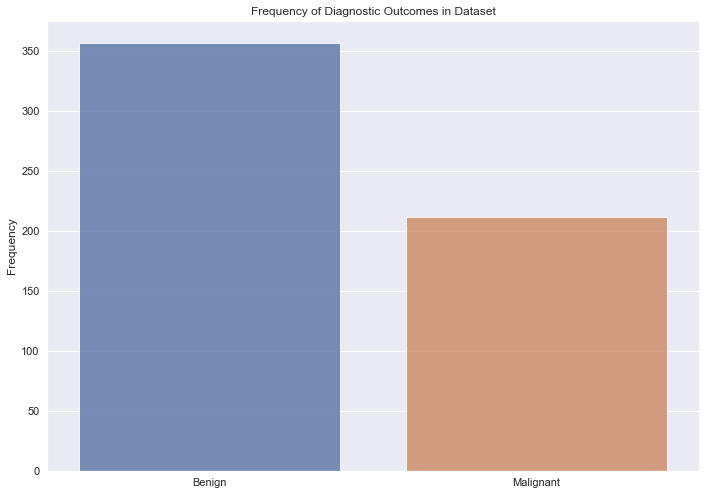

In [17]:
# Visualize frequency of diagnoses in dataset
sns.barplot(x = ['Benign', 'Malignant'], y = 'class_label', data = outcome_count, alpha = .8)
plt.title('Frequency of Diagnostic Outcomes in Dataset')
plt.ylabel('Frequency')
plt.show()

#### Visual Inspection of data looking at distrubution/variance for histology of benign and malignant tumors biopsies.

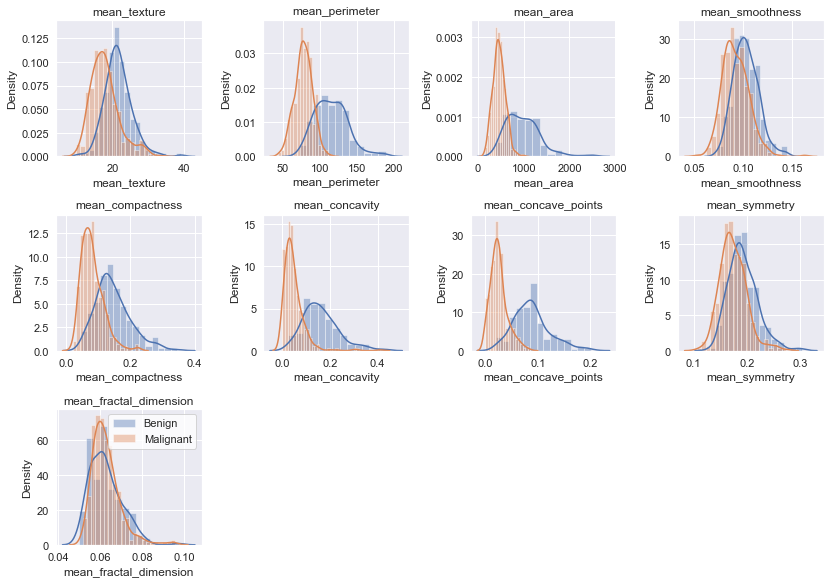

In [18]:
# Instantiate a figure object for OOP figure manipulation.
fig = plt.figure()

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(breast_data.columns[1:10])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3, 4, i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    sns.distplot(df_benign[b], kde=True, label='Benign')
    sns.distplot(df_malignant[b], kde=True, label='Malignant')
   
    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()   

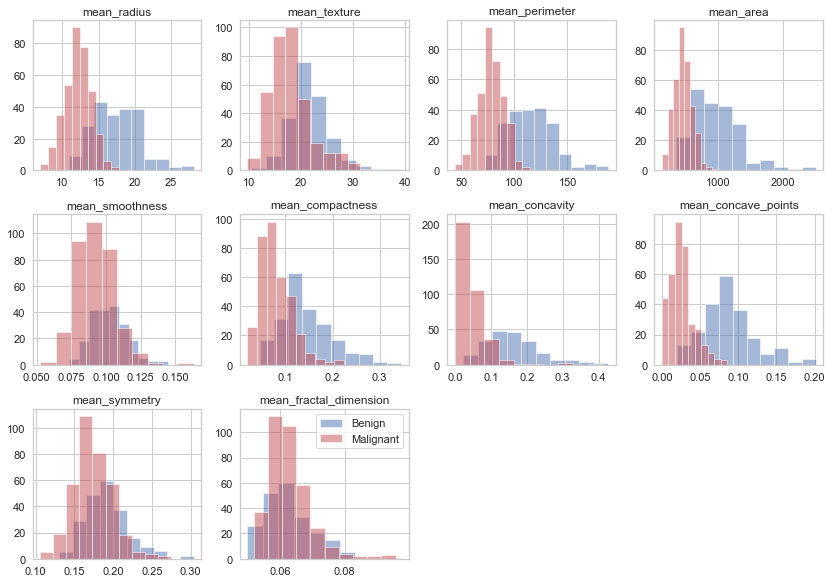

In [19]:
# Visualize tumor characteristics for positive and negatives diagnoses 

# Instantiate figure object
fig = plt.figure()

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(breast_data.columns[0:10])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3, 4, i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    ax.hist(df_benign[b], label = 'Benign', stacked = True, alpha=0.5, color= 'b')
    ax.hist(df_malignant[b], label= 'Malignant', stacked = True, alpha=0.5, color= 'r')
    
    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()   

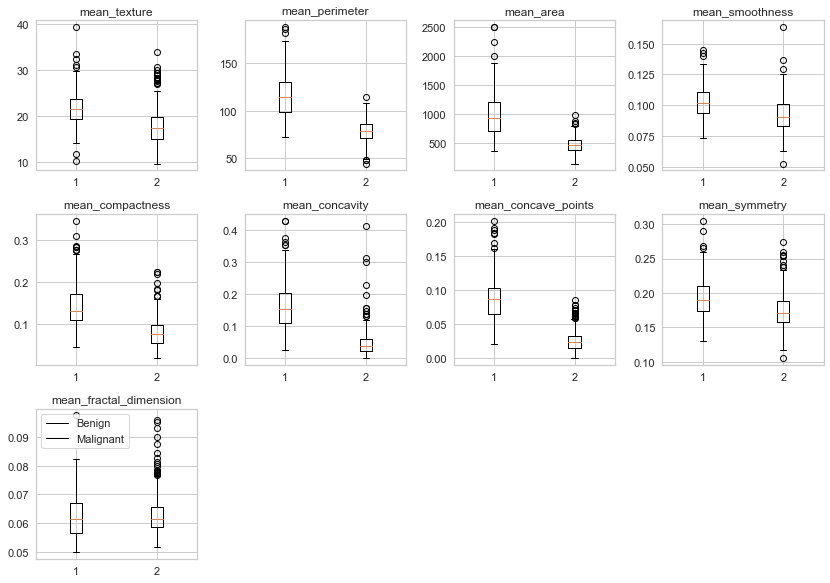

In [20]:
fig = plt.figure()

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(breast_data.columns[1:10])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    ax.boxplot([df_benign[b], df_malignant[b]])

    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend(['Benign', 'Malignant'], loc=2)
plt.show()   

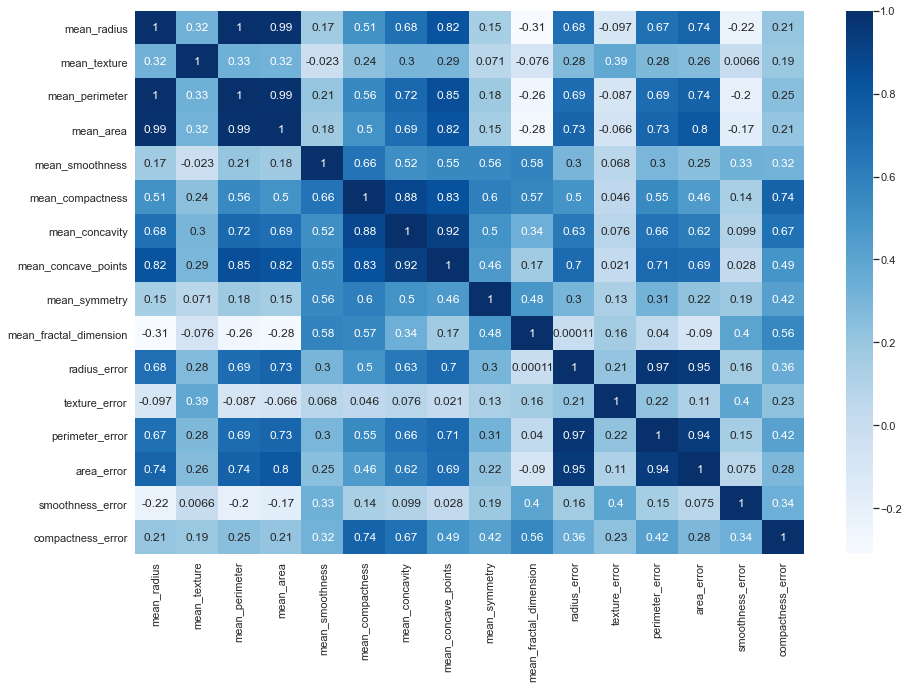

In [21]:
# Showing feature correlations
df_corr = breast_data.iloc[:, 0:16].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(df_corr, cmap="Blues", annot=True)
sns.set_style("whitegrid")
plt.show()

In [22]:
# Correction Table to view how each feature correlate to each other
corr = dr.correlation_table(breast_data); corr.tail(20)

mean_texture            0.415185
worst_symmetry          0.416294
worst_smoothness        0.421465
worst_texture           0.456903
area_error              0.548236
perimeter_error         0.556141
radius_error            0.567134
worst_compactness       0.590998
mean_compactness        0.596534
worst_concavity         0.659610
mean_concavity          0.696360
mean_area               0.708984
mean_radius             0.730029
worst_area              0.733825
mean_perimeter          0.742636
worst_radius            0.776454
mean_concave_points     0.776614
worst_perimeter         0.782914
worst_concave_points    0.793566
class_label             1.000000
Name: class_label, dtype: float64

It seems that:

There are strong correlations between many variables. Next, a heatmap will be used to present the numerical correlations.

The univariate distributions on the diagonal show a separation of malignant and benign cells for several mean features. Malignant cells tend to have larger mean values of:

* radius
* perimeter
* area
* compactness
* concavity
* concave points

#### Holdout Validation Approach - Train and Test Set Split
The holdout validation approach refers to creating the training and the holdout sets, also referred to as the 'test' or the 'validation' set. The training data is used to train the model while the unseen data is used to validate the model performance. The common split ratio is 70:30, while for small datasets, the ratio can be 90:10. However, We will use the 70:30 ratio split for the diabetes dataset. These method be used to run train the first three classifiers.

* Split data into training and test sets
* Normalize data to account for feature scaling

In [23]:
# Split data into testing and training set. Use 80/20 for training & testing sets
X_train, X_test, y_train, y_test = dr.train_test_data_split(breast_data)

In [24]:
# Calling scaler_features to normalize data to account for feature scaling
X_train_norm, X_test_norm = dr.scaler_features(X_train, X_test)

## Model Building
* Due to the scope of this project - I will be making use of some algorithms from scikit-learn to build various models such as SVM, KNN, Logistic Regression. And, if time permits, I will also include both parametric (e.g. SVM) and non-parametric (e.g. KNN) and linear (e.g. Logistic Regression) and nonlinear modles (e.g. Random Forest Classifier) and then final apply some optimization technics to improve the models.

## K Nearest Neighbors (K-NN) Classifier
K-NN was chosen amongst other algorithms (e.g. Support Vector Machines, Decision Trees and Naive Bayes), because it is quite fast and produces acceptable results. The speed of K-NN can be explained by the fact that this algorithm is a lazy learner and does not do much during training process unlike other classifiers that build the models. The performance of K-NN will be examined tuning the algorithm and applying various preprocessing steps.

##### Evaluation of the algorithm
Accuracy, i.e. the fraction of correct predictions is typically not enough information to evaluate a model. Although it is a starting point, it can lead to invalid decisions. Models with high accuracy may have inadequate precision or recall scores. For this reason the evaluation metrics that were also assessed are:

* Precision or the ability of the classifier not to label as positive a sample that is negative. The best value is 1 and the worst value is 0. In our study case, precision is when the algorithm guesses that a cell is malignant and actually measures how certain we are that this cell is a true malignant. For example, a precision of 0.9 means that if the model predicts 100 malignant cells, the 90 of them are malignant and the rest 10 are benign (false).

* Recall or the ability of the classifier to find all the positive samples. The best value is 1 and the worst value is 0. In context to the study, recall shows how well our identifier can find the malignant cells. For example, a low recall score of 0.8 indicates that our identifier finds only 80% of all the real malignant cells in the prediction. The rest 20% of real malignant cells will not be found by the diagnosis based on this algorithm, something that is unacceptable.

* F1 score, a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is: F1 = 2 x (precision x recall) / (precision + recall).

#### Building a Kmeans Model on the X_train_norm and testing on X_test_norm 
* In this particular classification I used Kmeans to build a model on the breast cancer dataset with 5 different k values. 
* Find the k optimal number.
* Then re-evaluate the model by re-running on the test data with the optimal k value.

#### Model 1: K Nearest Neighbors Classifier

In [25]:
# Calling K Nearest Neighbors method to predict the breast cancer dataset
y_pred_knn = dr.knn_classifier_model(X_train_norm, X_test_norm, y_train, y_test)


Perfomance Report:

Training time: 0.003 s
Prediction time: 0.013 s

Accuracy: 96.49% 

TP - True positives: 59
FP - False positives: 4
TN - True negativess: 106
FN - False negatives: 2

TPR - True positive rate: 93.65%
TNR - True negative rate: 98.15%
FPR - False Positive Rate: 3.7%
PPV - Positive predictive value: 93.65%
NPV - Negative predictive value: 98.15%
F1 - Score: 95.16%
ROC - Receiving Operating Characteristics Score 95.90% 

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171


Number of mislabeled points out of a total 171 points : 6


We can see that the accuracy for the model on the test data is approximately 96.49 percent.

In [26]:
# Printing predicted labels
predictions_nominal = ["M" if x < 0.5 else "B" for x in y_pred_knn]
predictions_nominal[1:10]

['M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B']

We can see that the accuracy for the model on the test data is approximately 96 percent. 

#### Model 2: Logistic Regression Model

In [27]:
# Calling logistic_regression_model method and also print preformance metric
y_pred_lr = dr.logistic_regression_model(X_train_norm, X_test_norm, y_train, y_test)


Perfomance Report:

Training time: 0.017 s
Prediction time: 0.0 s

Accuracy: 97.66% 

TP - True positives: 60
FP - False positives: 3
TN - True negativess: 107
FN - False negatives: 1

TPR - True positive rate: 95.24%
TNR - True negative rate: 99.07%
FPR - False Positive Rate: 2.78%
PPV - Positive predictive value: 95.24%
NPV - Negative predictive value: 99.07%
F1 - Score: 96.77%
ROC - Receiving Operating Characteristics Score 97.16% 

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        63
           1       0.97      0.99      0.98       108

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171


Number of mislabeled points out of a total 171 points : 4


We can see that the accuracy for the model on the test data is approximately 97.66 percent.

In [28]:
# Printing predicted labels
predictions_nominal = ["M" if x < 0.5 else "B" for x in y_pred_lr]
predictions_nominal[1:10]

['M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B']

We can see that the accuracy for the model on the test data is approximately 96.49 percent. The above technique is useful but it has pitfalls. The split is very important and, if it goes wrong, it can lead to model overfitting or underfitting the new data. This problem can be rectified using resampling methods, which repeat a calculation multiple times using randomly selected subsets of the complete data.

#### Model 3: GaussianNB (Naive Bayes)

In [29]:
# Calling GaussianNB Method and also print preformance metric
y_pred_gnb = dr.gaussianNB_model(X_train_norm, X_test_norm, y_train, y_test)


Perfomance Report:

Training time: 0.002 s
Prediction time: 0.0 s

Accuracy: 94.74% 

TP - True positives: 57
FP - False positives: 6
TN - True negativess: 105
FN - False negatives: 3

TPR - True positive rate: 90.48%
TNR - True negative rate: 97.22%
FPR - False Positive Rate: 5.56%
PPV - Positive predictive value: 90.48%
NPV - Negative predictive value: 97.22%
F1 - Score: 92.68%
ROC - Receiving Operating Characteristics Score 93.85% 

              precision    recall  f1-score   support

           0       0.95      0.90      0.93        63
           1       0.95      0.97      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171


Number of mislabeled points out of a total 171 points : 9


In [30]:
# Printing predicted labels
predictions_nominal = ["M" if x < 0.5 else "B" for x in y_pred_gnb]
predictions_nominal[1:10]

['M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B']

#### Model 4: Decision Tree Classifier

In [31]:
# Calling DecisionTreeClassifier Method and also print preformance metric
y_pred_dtc = dr.decisionTreeClassifier_model(X_train_norm, X_test_norm, y_train, y_test)


Perfomance Report:

Training time: 0.007 s
Prediction time: 0.001 s

Accuracy: 95.91% 

TP - True positives: 58
FP - False positives: 5
TN - True negativess: 106
FN - False negatives: 2

TPR - True positive rate: 92.06%
TNR - True negative rate: 98.15%
FPR - False Positive Rate: 4.63%
PPV - Positive predictive value: 92.06%
NPV - Negative predictive value: 98.15%
F1 - Score: 94.31%
ROC - Receiving Operating Characteristics Score 95.11% 

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        63
           1       0.95      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171


Number of mislabeled points out of a total 171 points : 7


In [32]:
# Printing predicted labels
predictions_nominal = ["M" if x < 0.5 else "B" for x in y_pred_dtc]
predictions_nominal[1:10]

['M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B']

KNN Classifier: ROC AUC = 0.959
Logistic Regression: ROC AUC = 0.972
Naive Bayes: ROC AUC = 0.938
Decision Tree: ROC AUC = 0.951


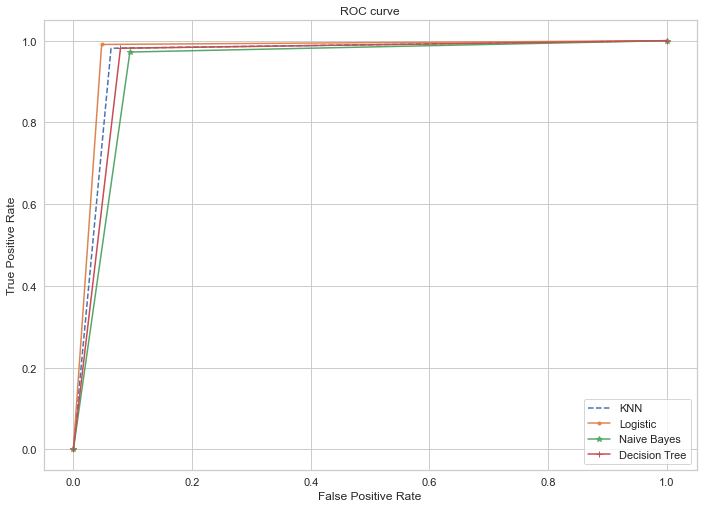

In [33]:
# calculate AUC
knn_auc = roc_auc_score(y_test, y_pred_knn)
lr_auc = roc_auc_score(y_test, y_pred_lr)
gnb_auc = roc_auc_score(y_test, y_pred_gnb)
dtc_auc = roc_auc_score(y_test, y_pred_dtc)

# Print AUC
print('KNN Classifier: ROC AUC = %.3f' % (knn_auc))
print('Logistic Regression: ROC AUC = %.3f' % (lr_auc))
print('Naive Bayes: ROC AUC = %.3f' % (gnb_auc))
print('Decision Tree: ROC AUC = %.3f' % (dtc_auc))

# calculate roc curves
knn_fpr, knn_tpr, _ = roc_curve(y_test, y_pred_knn)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred_lr)
gnb_fpr, gnb_tpr, _ = roc_curve(y_test, y_pred_gnb)
dtc_fpr, dtc_tpr, _ = roc_curve(y_test, y_pred_dtc)

# # plot the roc curve for the model
plt.plot(knn_fpr, knn_tpr, linestyle='--', label='KNN')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.plot(gnb_fpr, gnb_tpr, marker='*', label='Naive Bayes')
plt.plot(dtc_fpr, dtc_tpr, marker='+', label='Decision Tree')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
# show the legend
plt.legend(loc='best')
# show the plot
plt.show()

In [34]:
# Define parameters for optimization using dictionaries {parameter name: parameter list}
LR_params = {'C':[0.001, 0.1, 1, 10, 100]}
KNN_params = {'n_neighbors':[1, 5, 10, 20, 50], 'p':[2], 'metric':['minkowski', 'euclidean']}
DTC_params = {'criterion':['entropy', 'gini'], 'max_depth':[10, 50, 100, 200, 250]}
NB_params = {}

In [35]:
# Append list of models with parameter dictionaries
models_opt = []

models_opt.append(('LR', LogisticRegression(), LR_params))
models_opt.append(('KNN', KNeighborsClassifier(),KNN_params))
models_opt.append(('DTC', DecisionTreeClassifier(), DTC_params))
models_opt.append(('NB', GaussianNB(), NB_params))

In [36]:
# Computing all Kfold = 10 
results = []
names = []

# Setting random seed
seed = 42

def estimator_function(parameter_dictionary, scoring = 'accuracy'):      
    for name, model, params in models_opt:
    
        kfold = KFold(n_splits=10, random_state=seed, shuffle=True)

        model_grid = GridSearchCV(model, params)

        cv_results = cross_val_score(model_grid, X_train_norm, y_train, cv = kfold, scoring=scoring)

        results.append(cv_results)

        names.append(name)

        msg = "Cross Validation Accuracy [%s]: Accarcy: %.2f%% SD: %f " % (name, cv_results.mean()*100, cv_results.std())

        print(msg)

In [37]:
# Calling estimator function to kfold
estimator_function(models_opt, scoring = 'accuracy')

Cross Validation Accuracy [LR]: Accarcy: 97.23% SD: 0.026455 
Cross Validation Accuracy [KNN]: Accarcy: 95.74% SD: 0.044767 
Cross Validation Accuracy [DTC]: Accarcy: 91.46% SD: 0.063582 
Cross Validation Accuracy [NB]: Accarcy: 93.24% SD: 0.047443 


## Principle Component Analysis
Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.That is PCA helps us in reducing the number of variables of a data set, while preserving as much information as possiblereduce the number of variables of a data set, while preserving as much information as possible.

In [38]:
# Feature deduction method
pca = PCA().fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

#### Using PCA to Re-run kNN Classifier Model

In [39]:
# Calling K Nearest Neighbors method to predict the breast cancer dataset
y_pred_knn = dr.knn_classifier_model(X_train_pca, X_test_pca, y_train, y_test)


Perfomance Report:

Training time: 0.002 s
Prediction time: 0.006 s

Accuracy: 98.25% 

TP - True positives: 61
FP - False positives: 2
TN - True negativess: 107
FN - False negatives: 1

TPR - True positive rate: 96.83%
TNR - True negative rate: 99.07%
FPR - False Positive Rate: 1.85%
PPV - Positive predictive value: 96.83%
NPV - Negative predictive value: 99.07%
F1 - Score: 97.6%
ROC - Receiving Operating Characteristics Score 97.95% 

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        63
           1       0.98      0.99      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171


Number of mislabeled points out of a total 171 points : 3


#### Using PCA to Re-run Logistic regression model

In [40]:
# Calling logistic_regression_model method and also print preformance metric
y_pred_lr = dr.logistic_regression_model(X_train_pca, X_test_pca, y_train, y_test)


Perfomance Report:

Training time: 0.055 s
Prediction time: 0.001 s

Accuracy: 97.08% 

TP - True positives: 60
FP - False positives: 3
TN - True negativess: 106
FN - False negatives: 2

TPR - True positive rate: 95.24%
TNR - True negative rate: 98.15%
FPR - False Positive Rate: 2.78%
PPV - Positive predictive value: 95.24%
NPV - Negative predictive value: 98.15%
F1 - Score: 96.0%
ROC - Receiving Operating Characteristics Score 96.69% 

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        63
           1       0.97      0.98      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171


Number of mislabeled points out of a total 171 points : 5


#### Using PCA to Re-run GaussianNB Model

In [41]:
# Calling GaussianNB Method and also print preformance metric
y_pred_gnb = dr.gaussianNB_model(X_train_pca, X_test_pca, y_train, y_test)


Perfomance Report:

Training time: 0.006 s
Prediction time: 0.002 s

Accuracy: 87.72% 

TP - True positives: 51
FP - False positives: 12
TN - True negativess: 99
FN - False negatives: 9

TPR - True positive rate: 80.95%
TNR - True negative rate: 91.67%
FPR - False Positive Rate: 11.11%
PPV - Positive predictive value: 80.95%
NPV - Negative predictive value: 91.67%
F1 - Score: 82.93%
ROC - Receiving Operating Characteristics Score 86.31% 

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        63
           1       0.89      0.92      0.90       108

    accuracy                           0.88       171
   macro avg       0.87      0.86      0.87       171
weighted avg       0.88      0.88      0.88       171


Number of mislabeled points out of a total 171 points : 21


#### Using PCA to Re-run Decision Tree Classifier Model

In [42]:
# Calling DecisionTreeClassifier Method and also print preformance metric
y_pred_dtc = dr.decisionTreeClassifier_model(X_train_pca, X_test_pca, y_train, y_test)


Perfomance Report:

Training time: 0.007 s
Prediction time: 0.001 s

Accuracy: 92.40% 

TP - True positives: 56
FP - False positives: 7
TN - True negativess: 102
FN - False negatives: 6

TPR - True positive rate: 88.89%
TNR - True negative rate: 94.44%
FPR - False Positive Rate: 6.48%
PPV - Positive predictive value: 88.89%
NPV - Negative predictive value: 94.44%
F1 - Score: 89.6%
ROC - Receiving Operating Characteristics Score 91.67% 

              precision    recall  f1-score   support

           0       0.90      0.89      0.90        63
           1       0.94      0.94      0.94       108

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171


Number of mislabeled points out of a total 171 points : 13


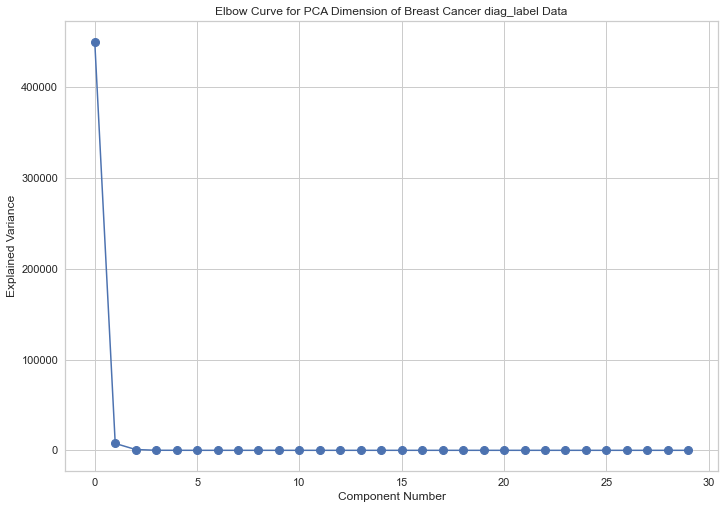

In [43]:
# Visualize explained variance with an increasing number of components
plt.plot(pca.explained_variance_, 'bo-', markersize=8)
plt.title("Elbow Curve for PCA Dimension of Breast Cancer diag_label Data")
plt.ylabel('Explained Variance')
plt.xlabel('Component Number')
sns.set_style("whitegrid")
plt.show()

#### Bagging Classification Method

In [44]:
# Calling and passing dataframe to the Bagging Classifier methods       
dr.baggingClassifier_Model(breast_data)

Accuracy: 98.83% [LogisticRegression()]
Accuracy: 95.91% [KNeighborsClassifier()]
Accuracy: 94.74% [GaussianNB()]
Accuracy: 95.32% [DecisionTreeClassifier()]


#### Principle Component Analysis with 3D

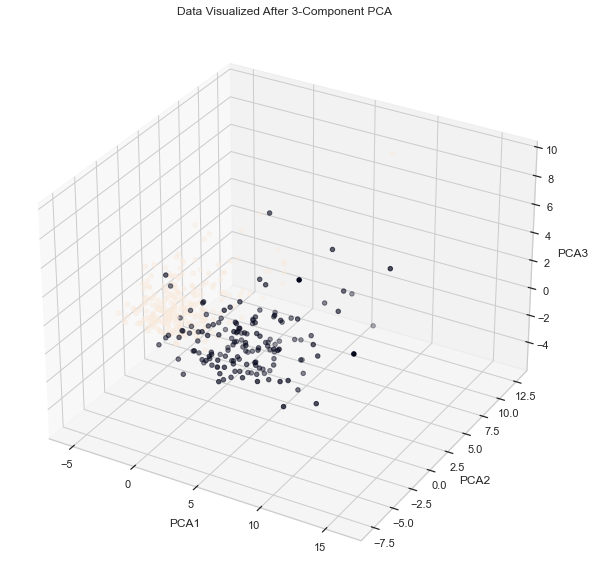

In [45]:
#Instantiate new PCA object
pca = PCA(n_components=3)

# Fit and transform training data with PCA using 3 components
pca.fit(X_train_norm)
X_train_norm_pca = pca.transform(X_train_norm)
X_test_norm_pca = pca.transform(X_test_norm)

# Create a dataframe of 3 PCA
pca_df = pd.DataFrame(X_train_norm_pca, columns = ['PCA1', 'PCA2', 'PCA3'])

# Append diagnosis data into PCA dataframe
pca_df['diag_label'] = y_train

# Visualize PCA in a 3D plot - color points by diagnsosis to see if a visuale stratification occurs
pca_fig = plt.figure().gca(projection = '3d')
pca_fig.scatter(pca_df['PCA1'], pca_df['PCA2'], pca_df['PCA3'], c = pca_df['diag_label'])
pca_fig.set_xlabel('PCA1')
pca_fig.set_ylabel('PCA2')
pca_fig.set_zlabel('PCA3')
pca_fig.set_title('Data Visualized After 3-Component PCA')

sns.set_style("whitegrid")
plt.tight_layout()
plt.show()

In [46]:
# Create features list to use to instantiate the FeatureUnion
kfold = KFold(n_splits=10, random_state=seed)
features = []

# Append features list
features.append(('pca', PCA(n_components=10)))
features.append(('select_best', SelectKBest(k=10)))

# Instantiate FeatureUnion object
feature_union = FeatureUnion(features)

# Create pipeline using esimator list, append with feature union and logistic regression
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', LogisticRegression()))

# Instantiate model using pipeline method
model_feature_union = Pipeline(estimators)

# Evaluate Pipeline model performance using cross validation
results_feature_union = cross_val_score(model_feature_union, X_train_norm, y_train, cv=kfold)

In [47]:
# Append results and names lists
results.append(results_feature_union)
names.append('LR-PCA')

Mean accuracy is for logistic regression after PCA is: 97.23% which is poorer compared       to the model accuracy without dimensional reduction.


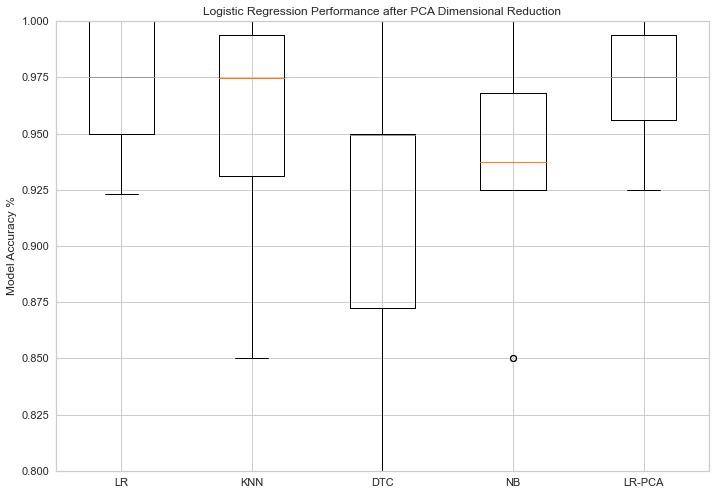

In [48]:
print('Mean accuracy is for logistic regression after PCA is: {:.2%} which is poorer compared \
      to the model accuracy without dimensional reduction.'.format(results_feature_union.mean()))
plt.boxplot( results, labels = names)
plt.ylabel('Model Accuracy %')
plt.ylim(.8,1)
plt.title('Logistic Regression Performance after PCA Dimensional Reduction')
plt.show()

# Summary

* Breast cancer diagnosis can be predicted with roughly 98% accuracy using these 31 histological tumor characteristics.
* Machine learning algorithms that performed the best include: kNN and logistic regression
* However, when it comes to the ensemble algorithms: The two classifiers also out-performed that rest of the models.
* The most predictive features found with recursive feature elimination and cross validation using logistic regression as a classifier are: mean texture, perimeter and area, and worst texture, perimeter, and area. 
* The most predictive features using random forest classification are: mean texture perimeter and area, fractal dimension, and worst area perimeter.